In [1]:
import openslide 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import ast
import cv2
import math
from skimage.measure import block_reduce

In [2]:
#Enter the paths
he_path = "/home/heckerm/data/CK/V5176_21_4_HE.mrxs"  #Path to H&E-WSI
pred_path = "/home/heckerm/bachelor/generate_slide/slide_V5176_21_4_ML_fm.tif" #Path to Predicted-WSI

In [3]:
mitotic = pd.read_csv('/home/heckerm/bachelor/mitotic_detection/mitotic_coordinates.csv', sep=";") #CSV with coordinates of the mitoses
mitotic = mitotic.applymap(ast.literal_eval)

In [4]:
he_slide = openslide.open_slide(he_path)
pred_slide = openslide.open_slide(pred_path)

In [5]:
slide_size = he_slide.level_dimensions[0]

In [6]:
dims = he_slide.dimensions

In [7]:
wsi_height = dims[1]
wsi_width = dims[0]

check_array = np.zeros((wsi_width, wsi_height))

In [8]:
he_name = he_path.split('/')[-1]

In [9]:
idx = 0
for coordinate in mitotic[he_name]:
    if coordinate is not False:
        try:
            check_array[coordinate] = 1
            #print(coordinate)
            idx += 1
        except:
            pass
    else:
        pass

In [10]:
check_array = check_array.astype(np.uint8)
check_array_downsample = block_reduce(check_array, block_size=(32,32), func=np.sum)

In [11]:
hpf_32 = int(6191/32)

In [12]:
dims = check_array_downsample.shape

In [13]:
x_old = 0
y_old = 0

x_koord = 0
y_koord = 0

roi_old = 0

for x in range(dims[1]):
    for y in range(dims[0]):
        
        roi = check_array_downsample[y_old:y_koord+193, x_old:x_koord+193].sum()
        
        y_old = y_koord
        y_koord += 1
        
        if roi > roi_old:
            roi_old = roi 
            print(f'Currently biggest roi: {roi}')
            
            y_roi = y_old
            x_roi = x_old
    
    x_old = x_koord
    x_koord += 1
    y_koord = 1
    y_old = 0

Currently biggest roi: 1
Currently biggest roi: 2
Currently biggest roi: 3
Currently biggest roi: 4
Currently biggest roi: 5
Currently biggest roi: 6
Currently biggest roi: 7
Currently biggest roi: 8
Currently biggest roi: 9
Currently biggest roi: 10
Currently biggest roi: 11
Currently biggest roi: 12
Currently biggest roi: 13
Currently biggest roi: 14
Currently biggest roi: 15
Currently biggest roi: 16
Currently biggest roi: 17
Currently biggest roi: 18
Currently biggest roi: 19
Currently biggest roi: 20
Currently biggest roi: 21


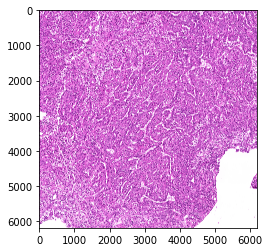

In [14]:
hpf_he = he_slide.read_region((y_roi*32, x_roi*32), level=0, size=(6191, 6191))
plt.imshow(hpf_he)
plt.show()

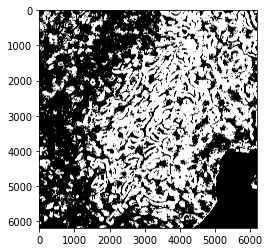

In [15]:
hpf_pred = pred_slide.read_region((y_roi*32, x_roi*32), level=0, size=(6191, 6191)).convert("RGB")
plt.imshow(hpf_pred)
plt.show()

In [16]:
area = 6191 * 6191
area

38328481

In [17]:
hpf_pred_array = np.asarray(hpf_pred)
hpf_pred_array = hpf_pred_array[:,:,0]

In [18]:
hpf_pred_array_c = hpf_pred_array.copy()
hpf_pred_array_c[hpf_pred_array_c == 255] = 1

In [19]:
white_area = hpf_pred_array_c.sum()
white_area

17441653

In [20]:
one_percent = area/100
one_percent

383284.81

In [21]:
percentage_epithel = white_area/one_percent
percentage_epithel.round(2)

45.51

## M/V-Index

In [22]:
k= 100/math.pi*(0.245)**2    
k

1.9106550918182033

In [23]:
mv_index = k*(roi_old/percentage_epithel)

In [24]:
print('M/V-Index:', mv_index)

M/V-Index: 0.8817298767900338
